## Mote Carolo Flächeninhalt

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

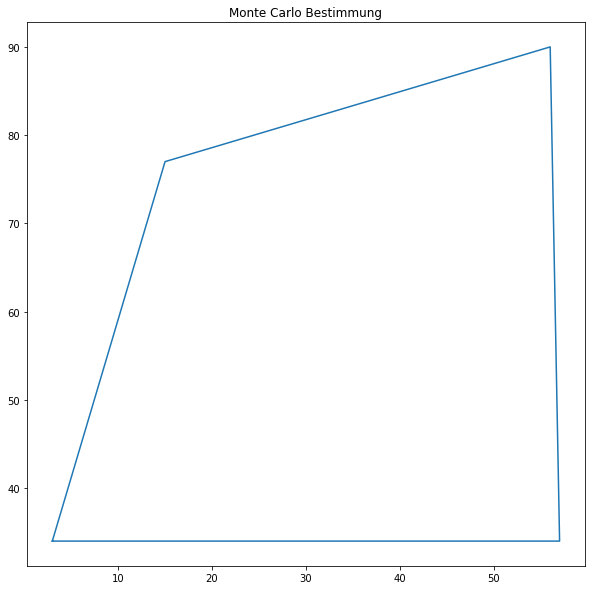

In [2]:
plt.figure(figsize=(10,10));

x = (3, 15 , 56 , 57, 3)
y = (34, 77, 90, 34, 34)
plt.plot(x,y)
plt.title("Monte Carlo Bestimmung");

## Feigenbau

In [4]:
x =[]
x0 = 0.5
r = 2.4
x.append(x0)
for i in range(1000):
    tmp = r*x[i]*(1-x[i])
    x.append(tmp)
print(x)

[0.5, 0.6, 0.576, 0.5861376, 0.582192753278976, 0.5837864431402113, 0.5831515966701891, 0.5834059487308756, 0.5833042745191261, 0.5833449548324209, 0.5833286844095562, 0.5833351928509741, 0.5833325895179783, 0.5833336308581475, 0.5833332143231952, 0.5833333809373545, 0.5833333142917193, 0.583333340949978, 0.5833333302866753, 0.5833333345519964, 0.5833333328458681, 0.5833333335283194, 0.5833333332553389, 0.5833333333645311, 0.5833333333208541, 0.583333333338325, 0.5833333333313366, 0.5833333333341321, 0.5833333333330137, 0.5833333333334612, 0.5833333333332822, 0.5833333333333537, 0.5833333333333252, 0.5833333333333366, 0.5833333333333319, 0.5833333333333339, 0.5833333333333331, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.583333333333

In [9]:
alphabet = "abcdefghijklmnopqrstuvwxyz0123456789"

def gentable(key):
    table = ""
    usedcharacters = {}
    for c in key:
        if c in usedcharacters:
            usedcharacters[c] += 1
        else: 
            usedcharacters[c] = 1
            table += c
    for c in alphabet:
        if c not in usedcharacters:
            table += c
    return table


def getkoord(l,table):
    i = table.index(l)
    row = int(i/6)
    col = i - row*6
    return row, col


def get_char_from_table(row,col,table):
    i = row*6+col
    return table[i]


def encode_chunk(chunk,table):
    r1,c1 = getkoord(chunk[0],table)
    r2,c2 = getkoord(chunk[1],table)
    
    if r1 == r2:
        l1 = get_char_from_table(r1,(c1+1)%6,table)
        l2 = get_char_from_table(r1,(c2+1)%6,table)
        
    elif c1 == c2:
        l1 = get_char_from_table((r1+1)%6,c1,table)
        l2 = get_char_from_table((r2+1)%6,c1,table)
            
    elif (r1-r2)*(c1-c2)>0:
        l2 = get_char_from_table(r2,c1,table)
        l1 = get_char_from_table(r1,c2,table)

    else:
        l1 = get_char_from_table(r1,c2,table)
        l2 = get_char_from_table(r2,c1,table)
        
    return ""+l1+l2

def dec_chunk(chunk,table):
    r1,c1 = getkoord(chunk[0],table)
    r2,c2 = getkoord(chunk[1],table)
    
    if r1 == r2:
        l1 = get_char_from_table(r1,(c1-1)%6,table)
        l2 = get_char_from_table(r1,(c2-1)%6,table)
        
    elif c1 == c2:
        l1 = get_char_from_table((r1-1)%6,c1,table)
        l2 = get_char_from_table((r2-1)%6,c1,table)
            
    elif (r1-r2)*(c1-c2)>0:
        l2 = get_char_from_table(r2,c1,table)
        l1 = get_char_from_table(r1,c2,table)

    else:
        l1 = get_char_from_table(r1,c2,table)
        l2 = get_char_from_table(r2,c1,table)
    
    return ""+l1+l2


def encode(message, key):
    table = gentable(key)
    #matrix = [[table[y*6+x] for x in range(6)] for y in range(6)]
    
    # small and only alpha letters
    message = message.lower()
    message = filter((lambda x: x in alphabet), message)
    
    
    # chunk the message
    chunks = []
    chunk = ''
    for c in message:
        if len(chunk) < 1:
            chunk = c
        elif len(chunk) == 1:
            if c != chunk:
                chunk += c
                chunks.append(chunk)
                chunk = ""
            elif c == "x":
                chunk += "z"
                chunks.append(chunk)
                chunk = c
            else:
                chunk += "x"
                chunks.append(chunk)
                chunk = c
    else: 
        if len(chunk) == 1:
            chunk += "z"
            chunks.append(chunk)
            
    encoded = []
    for chunk in chunks:
        tmp = encode_chunk(chunk,table)
        encoded.append(tmp)
        
    return "".join(encoded)
    


def decode(secret_message, key):
    table = gentable(key)
    
    chunks=[]
    for i in range(int(len(secret_message)/2)):
        chunks.append(secret_message[i*2]+secret_message[i*2+1])
    
    
    decoded = []
    for chunk in chunks:
        tmp = dec_chunk(chunk,table)
        decoded.append(tmp)
   
    print(decoded)

    return "".join(decoded)
    
    
    
    
    
    return secret_message


print (encode("Fizz Buzz is x89 XX.", "checkio101"))
print  (decode("do2y7mt22kry94y2y2", "checkio101"))


do2y7mt22kry94y2y2
['fi', 'zx', 'zb', 'uz', 'zi', 'sx', '89', 'xz', 'xz']
fizxzbuzzisx89xzxz


In [11]:
k ="as fdas fasf."



s2 = filter((lambda x: x.isalpha()), k)

print (s2)

In [13]:
alphabet = "abcdefghijklmnopqrstuvwxyz0123456789"

alphabet.index('c')


def getkoord(l,table):
    i = table.index(l)
    row = int(i/6)
    col = i - row*6
    return row, col


print (alphabet.split(2))

TypeError: must be str or None, not int

In [31]:
import math
dir(math)

['__doc__',
 '__file__',
 '__name__',
 '__package__',
 'acos',
 'acosh',
 'asin',
 'asinh',
 'atan',
 'atan2',
 'atanh',
 'ceil',
 'copysign',
 'cos',
 'cosh',
 'degrees',
 'e',
 'erf',
 'erfc',
 'exp',
 'expm1',
 'fabs',
 'factorial',
 'floor',
 'fmod',
 'frexp',
 'fsum',
 'gamma',
 'hypot',
 'isinf',
 'isnan',
 'ldexp',
 'lgamma',
 'log',
 'log10',
 'log1p',
 'modf',
 'pi',
 'pow',
 'radians',
 'sin',
 'sinh',
 'sqrt',
 'tan',
 'tanh',
 'trunc']

### Dreieckszahlen


In [8]:
def trianglenum(x):
    return sum([i for i in range(x+1)])


def get_t_nums(N):
    nums=[]
    i = 1
    while(trianglenum(i) <= N):
        nums.append(trianglenum(i))
        i += 1
    return nums


def find_sum(N,l,sol):
    while (len(l)>0):
        v = l.pop()
        if v+sum(sol)==N:
            l.append(v)
            return l
        if v+sum(sol) < N:
            sol.append(v)
            return find_sum(N,l,sol)



find_sum(64,get_t_nums(64),[])

[1, 3]